# University Data Analysis
• Analyzed American university regarding students’ preferences when it comes to choosing a university

• Analyzed related factors such as population, employment rate, and region within the US

• Implemented data visualization and map visualization


***Note***: Don't forget to expand the cell to see all the charts. To expand the cell, click on the arrow icon on the right of the title. Enjoy!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
# import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
sns.set_palette('brg')
from IPython.core.display import HTML

HTML(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# with pd.option_context("display.max_columns", None):
#     display(df);

# Data description

In [ ]:
universities_df = pd.read_excel('data/IPEDS_data.xlsx')
universities_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [ ]:
universities_df.shape

(1534, 145)

In [ ]:
print('The dataset contains {} rows and {} columns'.format(universities_df.shape[0], universities_df.shape[1]))

The dataset contains 1534 rows and 145 columns


# Data Preprocessing

## NaN values

In [ ]:
universities_df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [ ]:
perc_nan = universities_df.isna().sum() / len(universities_df) * 100

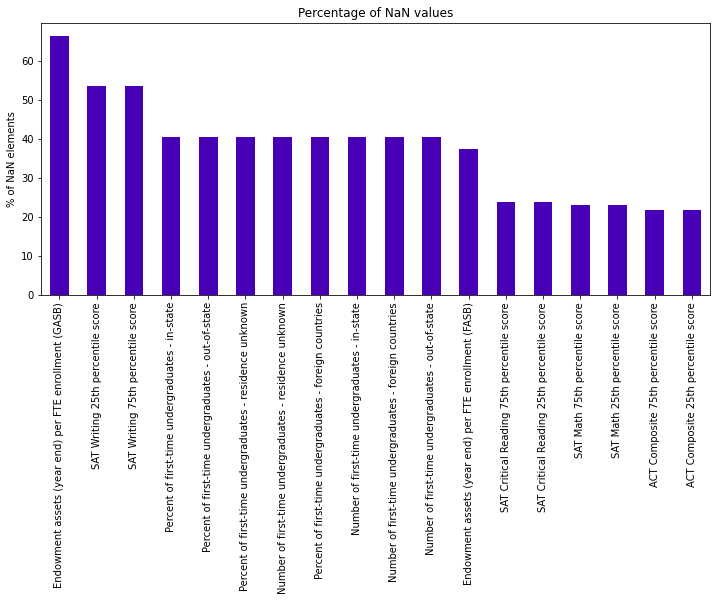

In [ ]:
ax = perc_nan[perc_nan >= 20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values', figsize=(12, 5))
ax.set_ylabel('% of NaN elements');

as a rule of thumb: if the columns  containing 20% of NaN values or more will be removed since those columns cannot be used as representative values. 

In [ ]:
high_nan_df = perc_nan[perc_nan >= 20].sort_values(ascending=False).reset_index()
high_nan_df.rename(columns= {'index': 'variables', 0: 'percentage_of_nan_values'}, inplace=True)

In [ ]:
fig = px.bar(high_nan_df, x='percentage_of_nan_values', y='variables', text_auto='.2s',
            title="Percentage of NaN values %")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show(renderer='colab')

In [ ]:
colum_off = universities_df.isna().sum()[universities_df.isna().sum() >= (0.2 * len(universities_df))]
list_colum_off = colum_off.index.to_list()

In [ ]:
universitiesnw_df = universities_df.copy()

In [ ]:
universitiesnw_df.drop(list_colum_off, axis=1, inplace=True)

Dataset contains a lot of columns, and some are not related to our objective. We extract the interesting columns to be analyzed.

In [ ]:
interesting_columns = ['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
                       "Latitude location of institution",
                       "Longitude location of institution",
                       "Offers Master's degree",
                       "Offers Doctor's degree - research/scholarship",
                       "Offers Doctor's degree - professional practice", 'Applicants total',
                       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
                       'Tuition and fees, 2013-14',
                       'Total price for in-state students living on campus 2013-14',
                       'Total price for out-of-state students living on campus 2013-14',
                       'State abbreviation', 'Control of institution', 'Total enrollment',
                       'Full-time enrollment', 'Part-time enrollment',
                       'Undergraduate enrollment', 'Graduate enrollment',
                       'Full-time undergraduate enrollment',
                       'Part-time undergraduate enrollment',
                       'Percent of total enrollment that are women',
                       'Percent of undergraduate enrollment that are women',
                       'Percent of graduate enrollment that are women',
                       'Graduation rate - Bachelor degree within 4 years, total',
                       'Graduation rate - Bachelor degree within 5 years, total',
                       'Graduation rate - Bachelor degree within 6 years, total',
                       ]

In [ ]:
universitiesnw_df = universitiesnw_df[interesting_columns]

In [ ]:
universitiesnw_df[universitiesnw_df['Total enrollment'].isna()][
    ['Name', 'Applicants total', 'Admissions total', 'Enrolled total', 'Total enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [ ]:
a = universitiesnw_df[universitiesnw_df['Name'] == 'University of North Georgia'].index[0]
b = universitiesnw_df[universitiesnw_df['Name'] == 'Texas A & M University-Galveston'].index[0]
universitiesnw_df = universitiesnw_df.drop([a, b], axis=0)

In [ ]:
print(
    'The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(
        universitiesnw_df.shape[1], universities_df.shape[1], universitiesnw_df.shape[0], universities_df.shape[0]))

The data frame now has 31 columns out of the 145 original columns, and 1532 rows out of the 1534 original rows.


## Invalid values

### Negative values

In [ ]:
col = universitiesnw_df.drop(['Longitude location of institution'], axis=1).select_dtypes(include=['float64', 'int64']).columns

In [ ]:
lt = list()
for i in col:
    y = any(x < 0 for x in universitiesnw_df[i])
    if y:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))
print(lt)

There are 0 negative values in the data frame.
[]


In [ ]:
universitiesnw_df.describe()

,year,Latitude location of institution,Longitude location of institution,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1532.000000,1532.000000,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,38.738880,-88.340955,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,4.828797,14.847153,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,19.701854,-158.062444,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,35.357463,-94.572947,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,39.947085,-84.514218,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,41.986733,-77.180590,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,64.857053,-67.456534,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Zero values

In [ ]:
total_zero = (universitiesnw_df[universitiesnw_df.loc[0:] == 0]).count().sum()

In [ ]:
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 395 zero values.


In [ ]:
universitiesnw_df.replace(0, np.nan, inplace=True)

In [ ]:
total_zero_nw = universitiesnw_df[universitiesnw_df.loc[0:] == 0].count().sum()

In [ ]:
print('This data set contains {} zero values.'.format(total_zero_nw))

This data set contains 0 zero values.


In [ ]:
universitiesnw_df[['Name', 'Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


### Formating column name

In [ ]:
def remove_space(column_name):
    list1 = list()
    words_header = column_name.split()
    size = int(len(words_header))

    for i in range(len(words_header)):
        if i < size - 1:
            list1.append(words_header[i] + '_')
        else:
            list1.append(words_header[i])

    separator = ''
    final = separator.join(list1)

    return final

In [ ]:
def remove_sp_char(column_name):
    if "'" in column_name:
        column_name = column_name.replace("'", '')
    if "," in column_name:
        column_name = column_name.replace(",", '')
    if "_-_" in column_name:
        column_name = column_name.replace("_-_", '_')
    if "/" in column_name:
        column_name = column_name.replace("/", '_or_')
    if ":" in column_name:
        column_name = column_name.replace(":", '')
    if "-" in column_name:
        column_name = column_name.replace("-", '_')

    return column_name

In [ ]:
list_new_head = list()
headers = universitiesnw_df.columns

for header in headers:
    header1 = remove_space(header)  # Spaces are replaced.
    header1 = header1.casefold()  # All capitalized letters are changed.
    header1 = remove_sp_char(header1)  # Special characters are replaced.

    if "degrese" in header1:  # One column name has a typo.
        header1 = header1.replace("degrese", 'degrees')

    list_new_head.append(header1)

In [ ]:
universitiesnw_df.columns = list_new_head

In [ ]:
universitiesnw_df.rename(columns={'state_abbreviation': 'state'}, inplace=True)

In [ ]:
universitiesnw_df[['state']].head(2)

,state
0,Alabama
1,Alabama


# EDA - Exploratory Data Analysis

In [ ]:
from IPython.display import display

with pd.option_context('display.max_columns', None):
    display(universitiesnw_df.describe())

,year,latitude_location_of_institution,longitude_location_of_institution,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1532.000000,1532.000000,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,38.738880,-88.340955,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,4.828797,14.847153,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,19.701854,-158.062444,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,35.357463,-94.572947,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,39.947085,-84.514218,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,41.986733,-77.180590,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,64.857053,-67.456534,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
high_app_df = universitiesnw_df[['name', 'applicants_total']].sort_values('applicants_total', ascending=False).head(20)

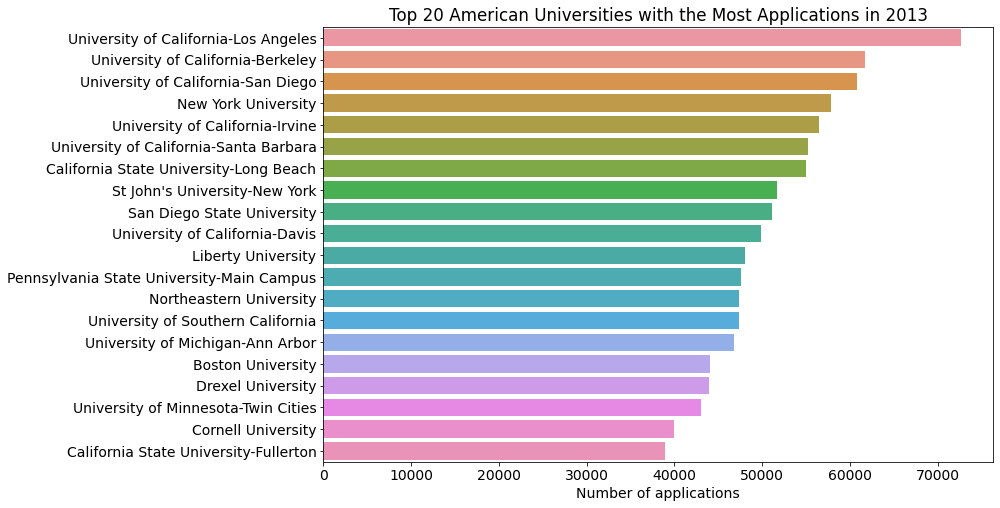

In [ ]:
plt.figure(figsize=(12, 8))
matplotlib.rcParams['font.size'] = 14
sns.barplot(x='applicants_total', y='name', data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('');

In [ ]:

fig = px.bar(high_app_df, x='applicants_total', y='name',
color='applicants_total', title='Top 20 American Universities with the Most Applications in 2013')

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show(renderer='colab')

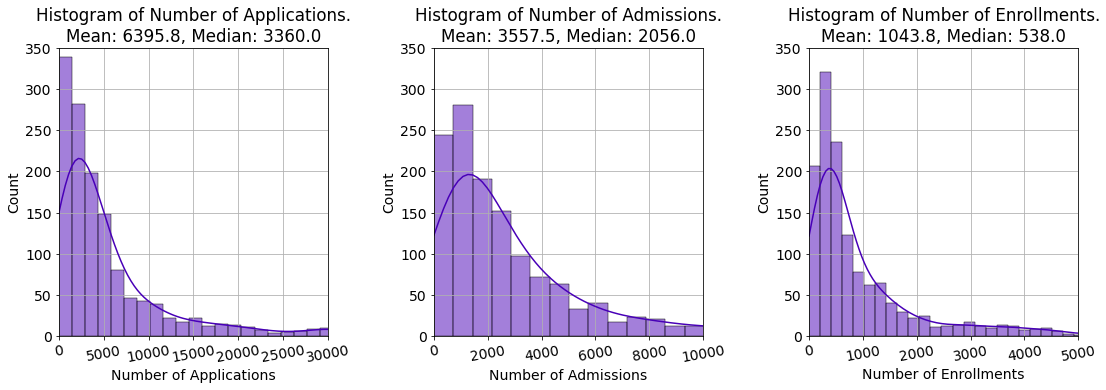

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.histplot(universitiesnw_df.applicants_total, bins=50, kde='True')
plt.title('''Histogram of Number of Applications.
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.applicants_total.mean(),
                                       universitiesnw_df.applicants_total.median()))
plt.xlabel('Number of Applications')
plt.axis([0, 30000, 0, 350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1, 3, 2)
sns.histplot(universitiesnw_df.admissions_total, bins=50, kde='True')
plt.title('''Histogram of Number of Admissions.
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.admissions_total.mean(),
                                       universitiesnw_df.admissions_total.median()))
plt.axis([0, 10000, 0, 350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1, 3, 3)
sns.histplot(universitiesnw_df.enrolled_total, bins=50, kde='True')
plt.title('''Histogram of Number of Enrollments.
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.enrolled_total.mean(),
                                       universitiesnw_df.enrolled_total.median()));
plt.axis([0, 5000, 0, 350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

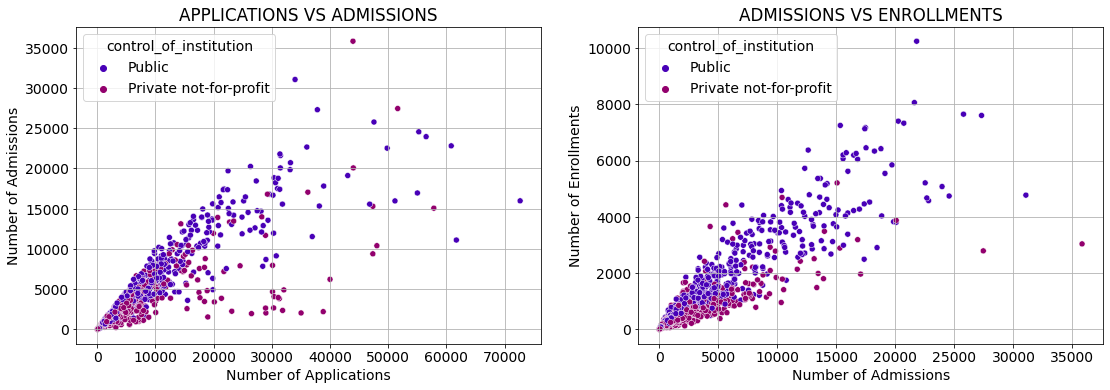

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=universitiesnw_df.admissions_total, x=universitiesnw_df.applicants_total,
                hue=universitiesnw_df.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total', y='enrolled_total', data=universitiesnw_df, hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

In [ ]:
fig = px.scatter(universitiesnw_df, x="enrolled_total", y="admissions_total", color="control_of_institution",
                 title="Admissions vs Enrollments")

fig.show(renderer="colab")

In [ ]:
universitiesnw_df['acceptance_rate'] = (
        universitiesnw_df.admissions_total / universitiesnw_df.applicants_total * 100).round(2)

In [ ]:
universitiesnw_df['enrollment_rate'] = (
        universitiesnw_df.enrolled_total / universitiesnw_df.admissions_total * 100).round(2)

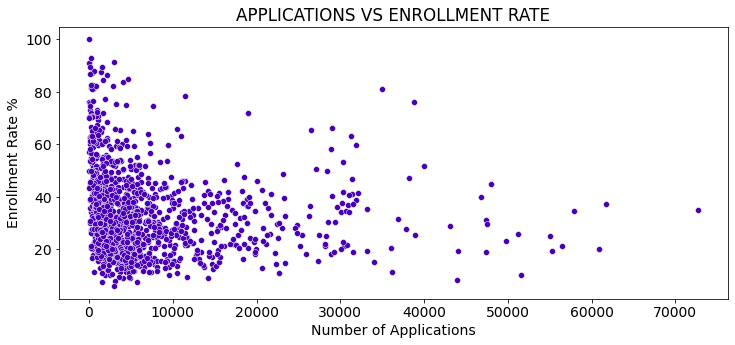

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='applicants_total', y='enrollment_rate', data=universitiesnw_df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

In [ ]:
fig = px.scatter(universitiesnw_df, x="applicants_total", y="enrollment_rate", color='enrollment_rate',
                 title="Applications vs Enrollment Rate")

fig.show(renderer="colab")

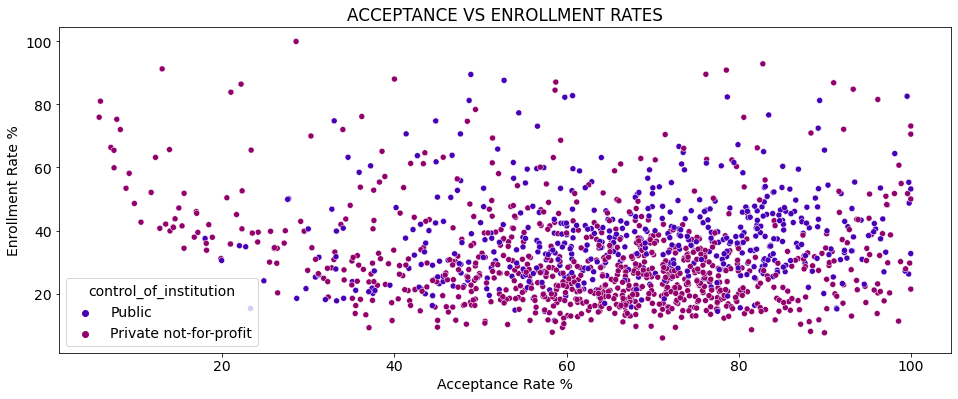

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='acceptance_rate', y='enrollment_rate', data=universitiesnw_df,
                hue=universitiesnw_df.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');


In [ ]:
fig = px.scatter(universitiesnw_df, x="acceptance_rate", y="enrollment_rate", 
                symbol="control_of_institution",
                 color='enrollment_rate',
                 title="Acceptance Rate % vs Enrollment Rate %")

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show(renderer="colab")

In [ ]:
high_acceptance = universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][
    ['name', 'acceptance_rate', 'enrollment_rate']].sort_values('acceptance_rate', ascending=False).head(25)

In [ ]:
low_acceptance = universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][
    ['name', 'acceptance_rate', 'enrollment_rate']].sort_values('acceptance_rate', ascending=False).tail(25)

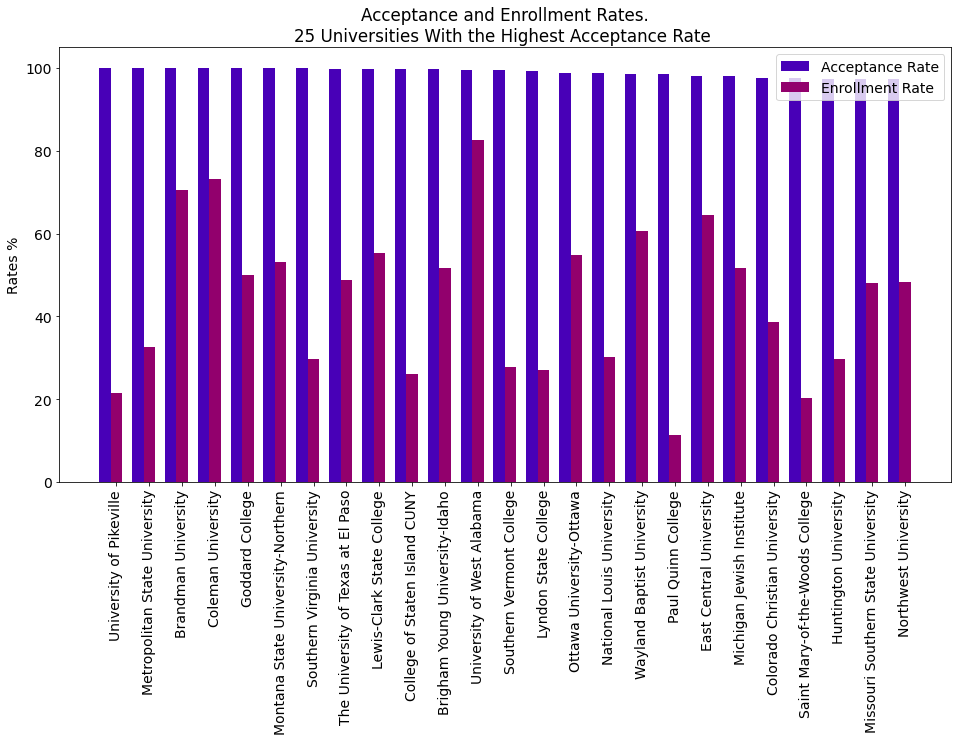

In [ ]:
plt.figure(figsize=(16, 8))
ind = np.arange(len(high_acceptance))  #number of universities
width = 0.35  #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width, label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width, high_acceptance.name.values, rotation=90)
plt.legend(loc='best');

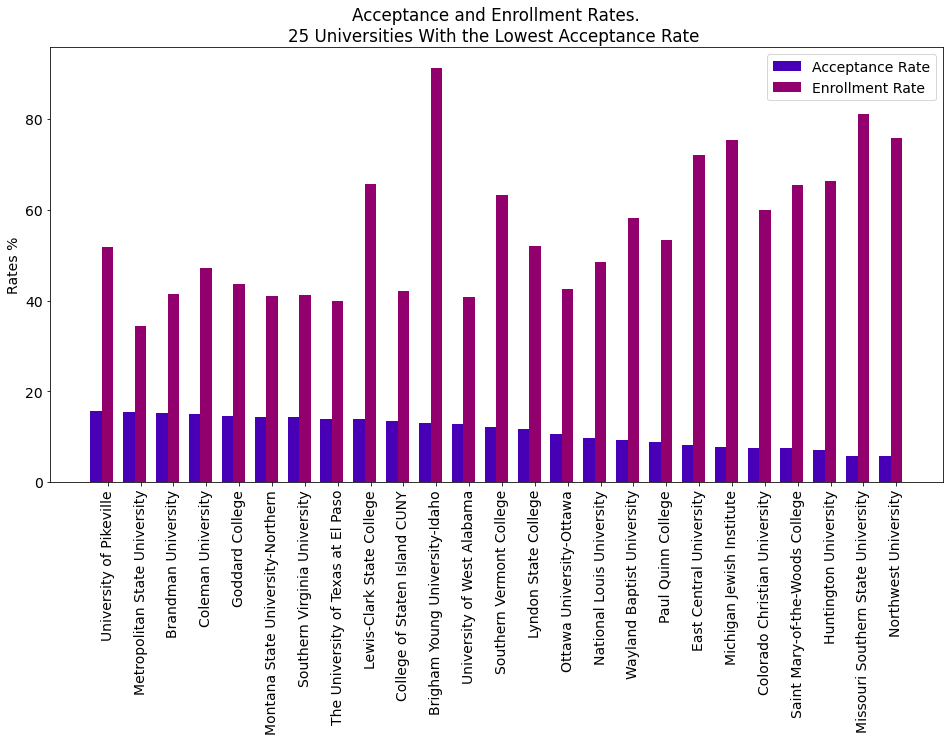

In [ ]:
plt.figure(figsize=(16, 8))

ind = np.arange(len(low_acceptance))  #number of universities
width = 0.35  #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width, label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width, high_acceptance.name.values, rotation=90)
plt.legend(loc='best');

In [ ]:
#spliting the number of applications according to the type of control: private or public.
uni_private_df = universitiesnw_df[universitiesnw_df.control_of_institution == 'Private not-for-profit']
uni_private_df = uni_private_df[uni_private_df.applicants_total.notnull()]

uni_public_df = universitiesnw_df[universitiesnw_df.control_of_institution == 'Public']
uni_public_df = uni_public_df[uni_public_df.applicants_total.notnull()]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



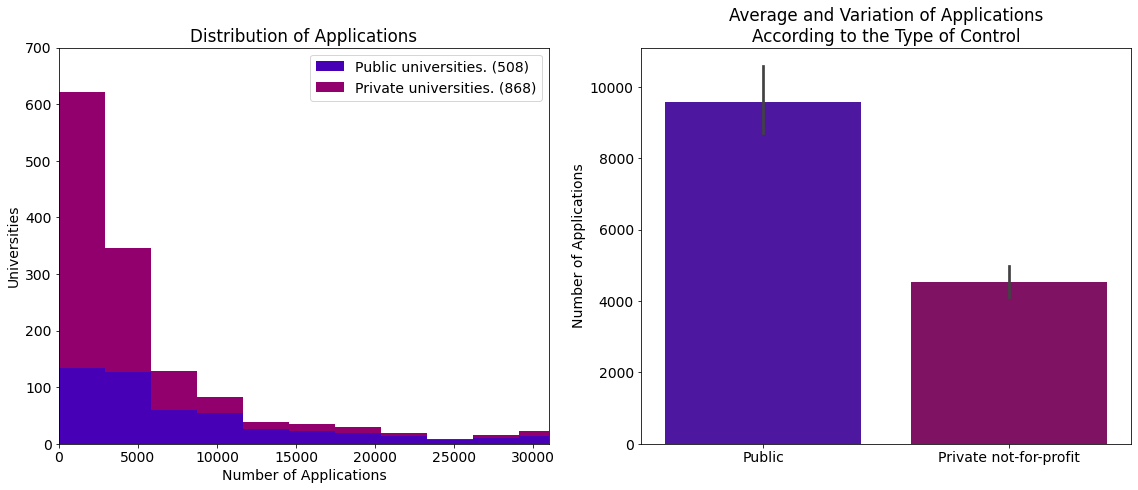

In [ ]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.hist([uni_public_df.applicants_total, uni_private_df.applicants_total], stacked=True, bins=25)
plt.axis([0, 31000, 0, 700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(
    ['Public universities. ({})'.format(uni_public_df.shape[0]), 'Private universities. ({})'.format(uni_private_df.shape[0])])

plt.subplot(1, 2, 2)
sns.barplot(x=universitiesnw_df.control_of_institution, y=universitiesnw_df.applicants_total)
plt.title('''Average and Variation of Applications
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications')
plt.tight_layout(pad=1)
plt.show()

In [ ]:
print(
    'The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(
        int(uni_private_df.applicants_total.min()), int(uni_public_df.applicants_total.min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 193.


In [ ]:
print(
    'The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(
        int(uni_private_df.applicants_total.max()), int(uni_public_df.applicants_total.max())))

The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


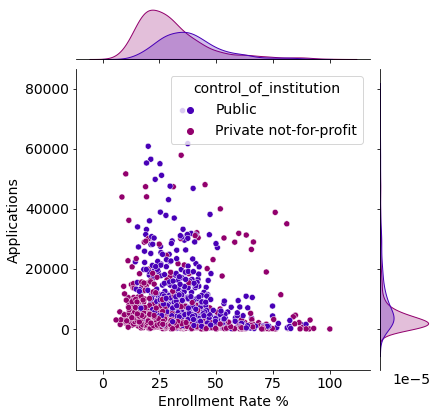

In [ ]:
g = sns.jointplot(x=universitiesnw_df.enrollment_rate, y=universitiesnw_df.applicants_total,
                  hue=universitiesnw_df.control_of_institution, height=6)
g = (g.set_axis_labels("Enrollment Rate %", "Applications"));


In [ ]:
fig = px.scatter(universitiesnw_df, x='enrollment_rate', y='applicants_total',
                 color='control_of_institution',
                 marginal_x="box", marginal_y="violin")
fig.show(renderer="colab")

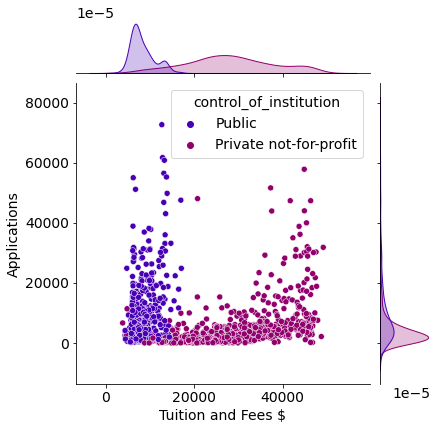

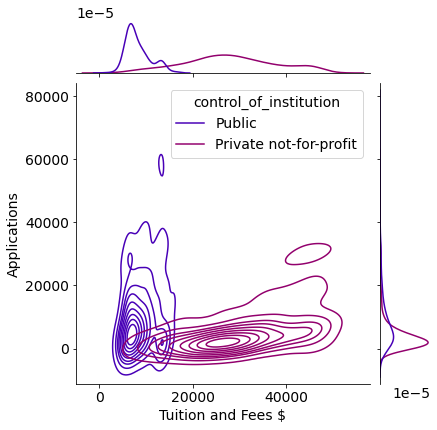

In [ ]:
sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14, y=universitiesnw_df.applicants_total,
                  hue=universitiesnw_df.control_of_institution, height=6).set_axis_labels("Tuition and Fees $", "Applications")

sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14, y=universitiesnw_df.applicants_total,
              hue=universitiesnw_df.control_of_institution, kind='kde', height=6).set_axis_labels("Tuition and Fees $",
                                                                                                  "Applications");

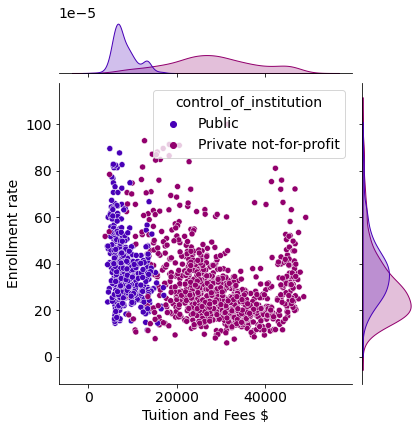

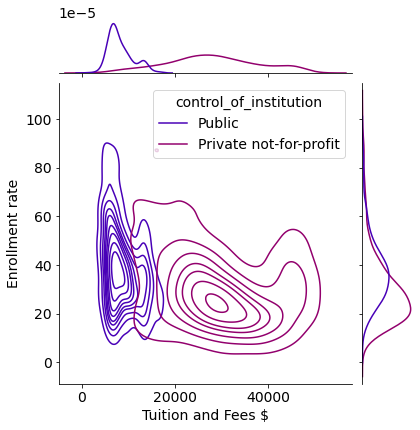

In [ ]:
sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14, y=universitiesnw_df.enrollment_rate,
                  hue=universitiesnw_df.control_of_institution, height=6).set_axis_labels('Tuition and Fees $', 'Enrollment rate')

sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14, y=universitiesnw_df.enrollment_rate,
                  hue=universitiesnw_df.control_of_institution, height=6, kind='kde').set_axis_labels('Tuition and Fees $', 'Enrollment rate');

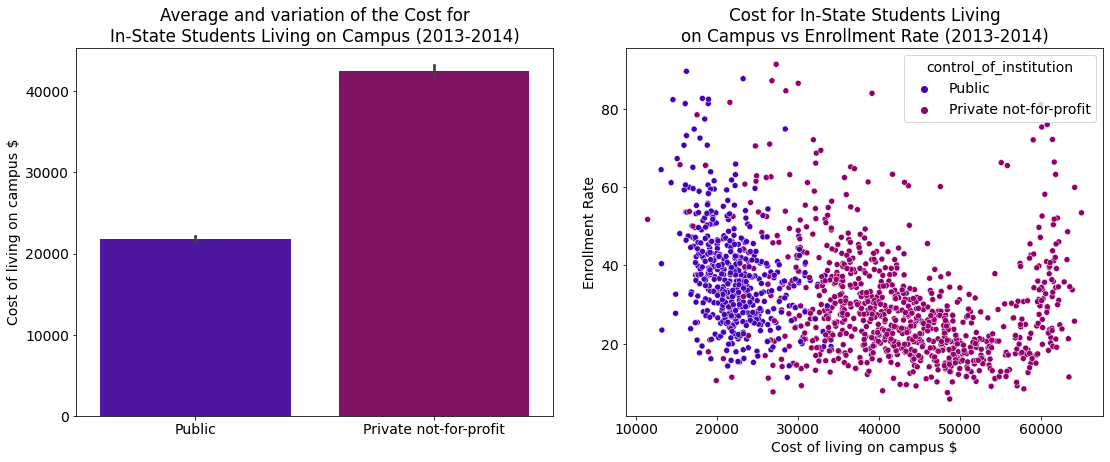

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
sns.barplot(y=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,
            x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost for
In-State Students Living on Campus (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.subplot(1, 2, 2)
sns.scatterplot(x=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,
                y=universitiesnw_df.enrollment_rate, hue=universitiesnw_df.control_of_institution)
plt.title('''Cost for In-State Students Living
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.tight_layout(pad=2)

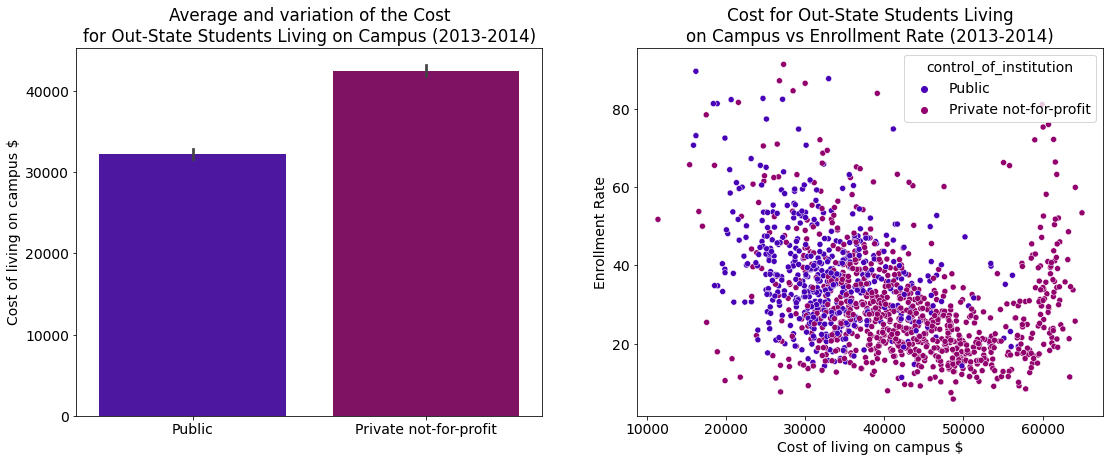

In [ ]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 2)
sns.scatterplot(x=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,
                y=universitiesnw_df.enrollment_rate, hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for Out-State Students Living
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1, 2, 1)
sns.barplot(y=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,
            x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost
for Out-State Students Living on Campus (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

In [ ]:
region = pd.read_csv('data/region.csv')

In [ ]:
universitiesnw_df = universitiesnw_df.merge(region, on='state')

In [ ]:
in_state_df = universitiesnw_df[
    ['name', 'enrollment_rate', 'total_price_for_in_state_students_living_on_campus_2013_14', 'control_of_institution',
     'state', 'region']]
in_state_df = in_state_df.rename(columns={'total_price_for_in_state_students_living_on_campus_2013_14': 'price_living'})
in_state_df['from'] = 'In-State'

In [ ]:
out_state_df = universitiesnw_df[
    ['name', 'enrollment_rate', 'total_price_for_out_of_state_students_living_on_campus_2013_14',
     'control_of_institution', 'state', 'region']]
out_state_df = out_state_df.rename(
    columns={'total_price_for_out_of_state_students_living_on_campus_2013_14': 'price_living'})
out_state_df['from'] = 'Out-State'

In [ ]:
# Merge the two dataframes with concat
in_out_state_df= pd.concat([in_state_df, out_state_df], ignore_index=True)
# in_out_state_df = in_state_df.append(out_state_df, ignore_index=True)

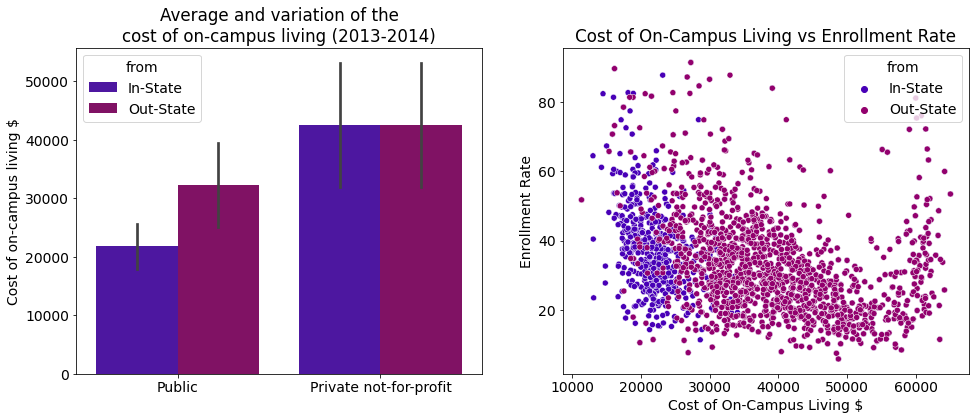

In [ ]:
plt.figure(figsize=(16, 6))

#with standard deviation
plt.subplot(1, 2, 1)
sns.barplot(x='control_of_institution', y='price_living', data=in_out_state_df, hue='from', ci="sd") # palette='hot'
plt.title('''Average and variation of the
cost of on-campus living (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $')

plt.subplot(1, 2, 2)
sns.scatterplot(x='price_living', y='enrollment_rate', data=in_out_state_df, hue='from')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

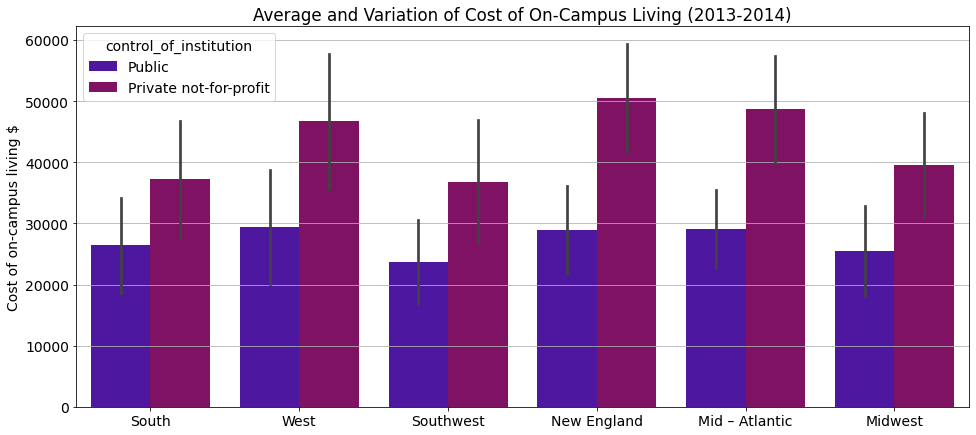

In [ ]:
plt.figure(figsize=(16, 7))
sns.barplot(x='region', y='price_living', data=in_out_state_df, hue='control_of_institution', ci="sd") #palette='Accent'
plt.title('Average and Variation of Cost of On-Campus Living (2013-2014)')
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $');

In [ ]:
fig = px.histogram(in_out_state_df, x="region", y="price_living",
             color='control_of_institution', barmode='group',
             height=400)
fig.show(renderer='colab')

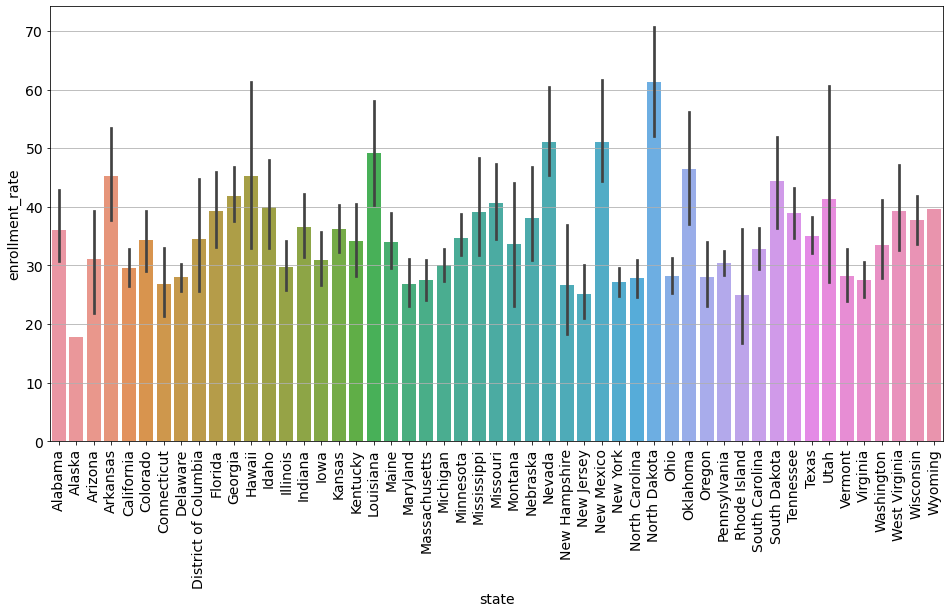

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x=universitiesnw_df.state, y=universitiesnw_df.enrollment_rate)
plt.grid(axis='y')
plt.xticks(rotation=90);

In [ ]:
with open('data/states_population.csv') as file:
    population_df = pd.read_csv(file)

In [ ]:
population_df.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [ ]:
universitiesnw_df = universitiesnw_df.merge(population_df, on='state')
universitiesnw_df = universitiesnw_df.rename(columns={'population_2013': 'population'})

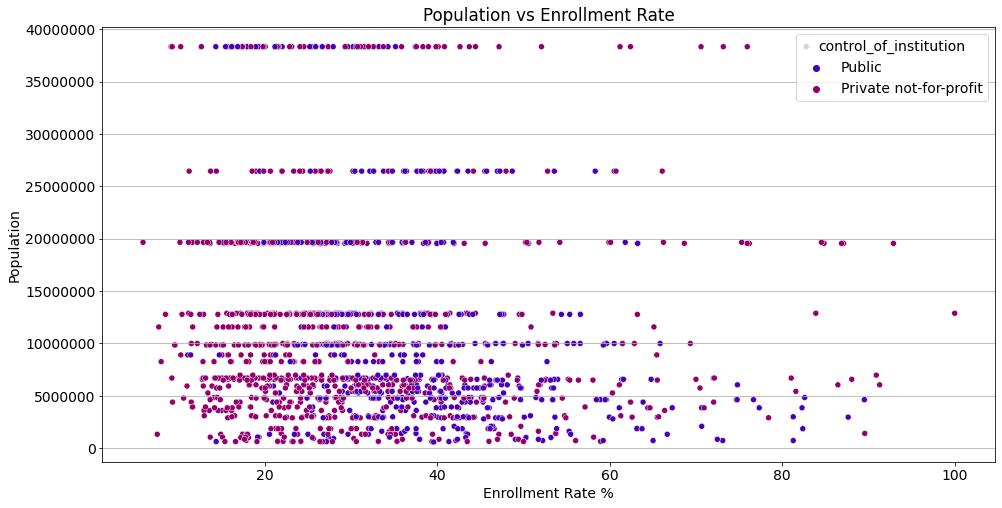

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(y='population', x='enrollment_rate', data=universitiesnw_df, hue='control_of_institution')
plt.title('Population vs Enrollment Rate')
plt.grid(axis='y')
ax.ticklabel_format(style='plain')
plt.ylabel('Population')
plt.xlabel('Enrollment Rate %');

In [ ]:
fig = px.scatter(universitiesnw_df, y='population', x='enrollment_rate', color="control_of_institution",
           title='Population vs Enrollment Rate')
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(universitiesnw_df, x="enrollment_rate", y="population", color="control_of_institution",
                  marginal_x="box", marginal_y="violin")
fig.show(renderer='colab')

In [ ]:
fig = px.scatter_3d(universitiesnw_df, x='enrollment_rate', y='acceptance_rate', z='population',
              color='control_of_institution')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show(renderer='colab')

In [ ]:
with open('data/states_gdp.csv') as file:
    gdp_df = pd.read_csv(file)

In [ ]:
gdp_df.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [ ]:
gdp_df.drop(columns=['code'], inplace=True)

In [ ]:
universitiesnw_df = universitiesnw_df.merge(gdp_df, on='state')

In [ ]:
universitiesnw_df[['state', 'gdp_million', 'population']].head()

,state,gdp_million,population
0,Alabama,191481.0,4833722
1,Alabama,191481.0,4833722
2,Alabama,191481.0,4833722
3,Alabama,191481.0,4833722
4,Alabama,191481.0,4833722


In [ ]:
universitiesnw_df['gdp_capita'] = universitiesnw_df.gdp_million / universitiesnw_df.population * 1e6

In [ ]:
gdp_state_df = universitiesnw_df.groupby('state')[['region', 'gdp_capita', 'latitude_location_of_institution',
                                                   'longitude_location_of_institution']].mean().sort_values('gdp_capita',ascending=False)


In [ ]:
gdp_f25 = gdp_state_df[['gdp_capita']].head(25)
gdp_l25 = gdp_state_df[['gdp_capita']].tail(25)

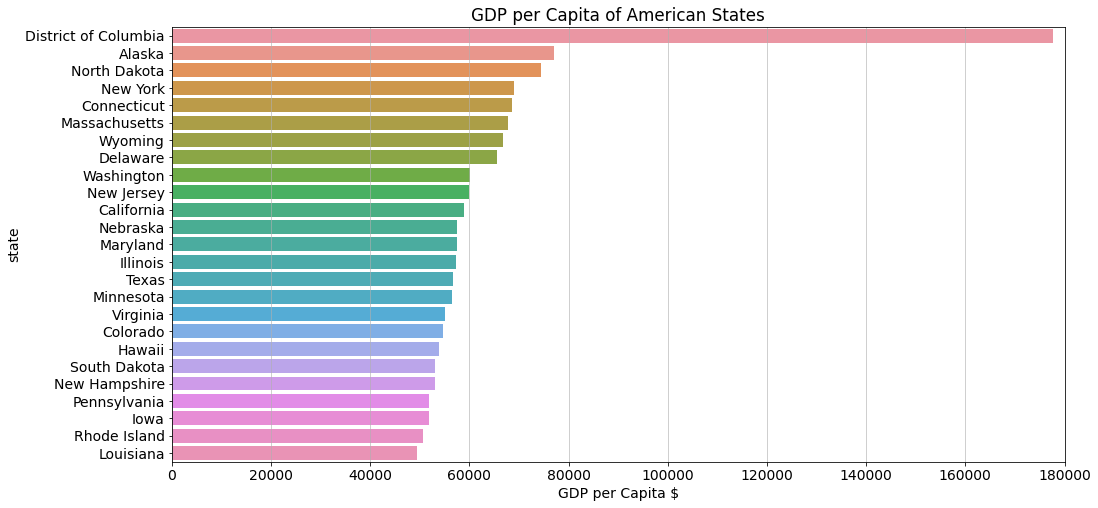

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=gdp_f25.gdp_capita, y=gdp_f25.index)
ax.set_xlim((0, 180000))
plt.title('GDP per Capita of American States')
plt.xlabel('GDP per Capita $')
plt.grid(axis='x', alpha=0.75)

In [ ]:
fig = px.bar(x=gdp_f25.gdp_capita, y=gdp_f25.index, text_auto='.2s',
              labels={
                     "y": "states",
                     "x": "GDP per Capita $",
                 },
            title="Default: various text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show(renderer='colab')

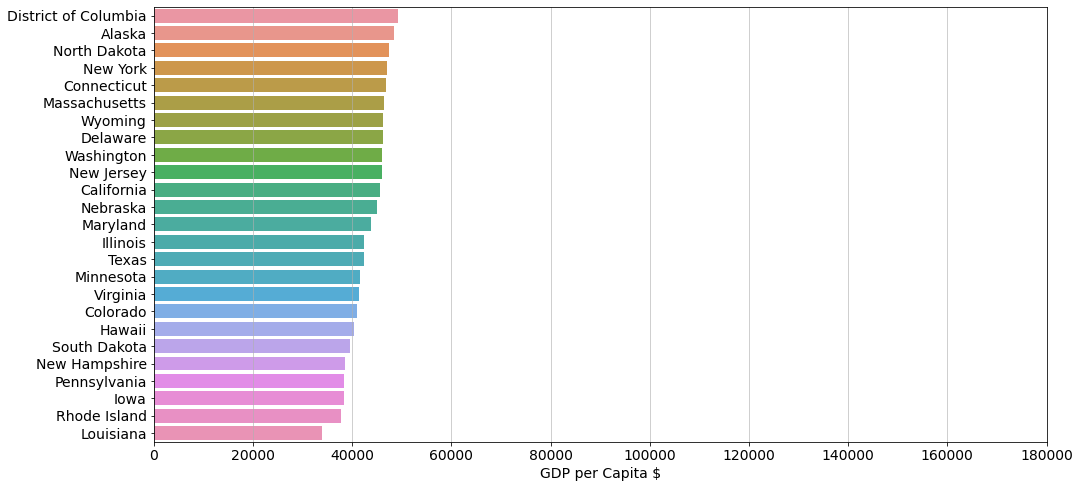

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=gdp_l25.gdp_capita, y=gdp_f25.index)
ax.set_xlim((0, 180000))
plt.xlabel('GDP per Capita $')
plt.ylabel(''), plt.grid(axis='x', alpha=0.75);

In [ ]:
fig = px.bar(x=gdp_l25.gdp_capita, y=gdp_l25.index, text_auto='.2s',
             labels={
                     "y": "states",
                     "x": "GDP per Capita $",
                 },
            title="Default: various text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis_range=[20000,180000], barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show(renderer='colab')

In [ ]:
fig = px.scatter_3d(universitiesnw_df, x='enrollment_rate', y='region', z='population', color='gdp_capita', symbol='control_of_institution',
                    hover_data=['name'])
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(margin=dict(l=0, r=0, b=1, t=0))
fig.show(renderer='colab')

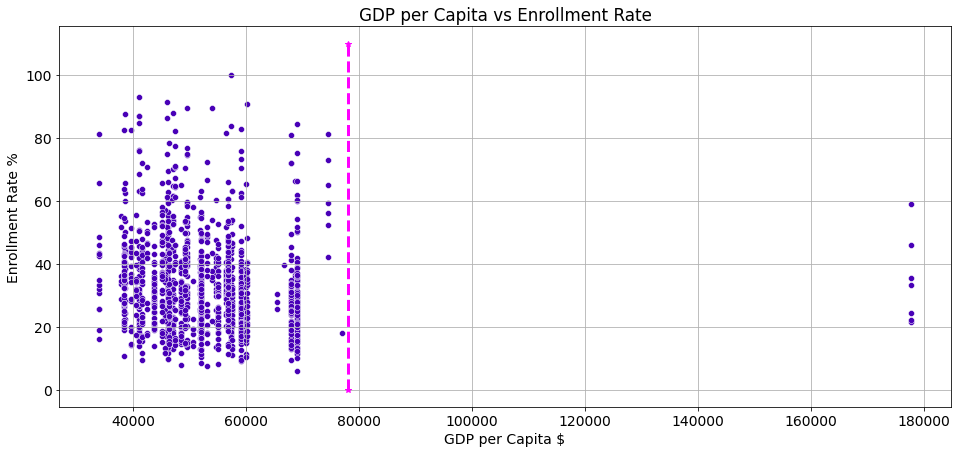

In [ ]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x='gdp_capita', y='enrollment_rate', data=universitiesnw_df)
plt.plot([78000, 78000], [0, 110], c='magenta', lw=3, marker='*', ls='--')
plt.title('GDP per Capita vs Enrollment Rate')
plt.grid()
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %');

In [ ]:
fig = px.scatter(universitiesnw_df, x='gdp_capita', y='enrollment_rate', 
                 symbol="control_of_institution",
                 color='enrollment_rate',
           title='GDP per Capita vs Enrollment Rate')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.75
))

fig.show(renderer="colab")

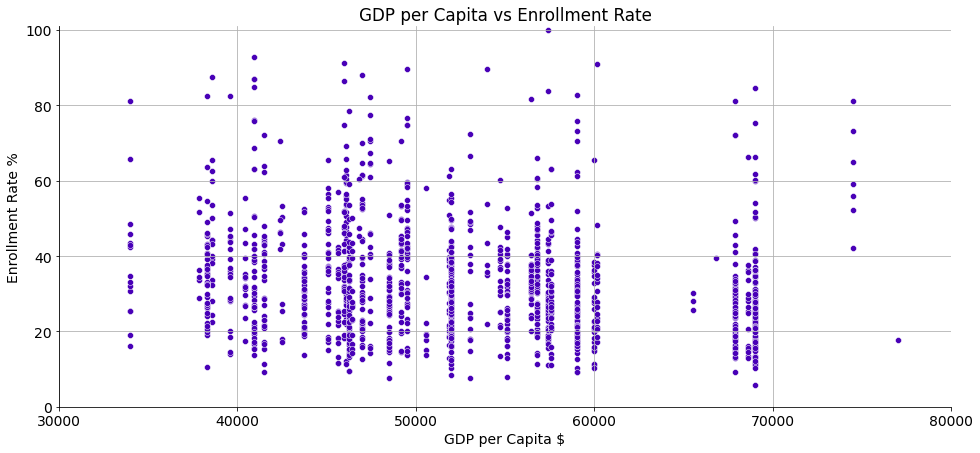

In [ ]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x='gdp_capita', y='enrollment_rate', data=universitiesnw_df)
plt.axis([30000, 80000, 0, 101])
plt.grid()
plt.title('GDP per Capita vs Enrollment Rate')
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %')
sns.despine();

In [ ]:
names = universitiesnw_df.columns[universitiesnw_df.columns.str.startswith('offers')].values
degree = universitiesnw_df[universitiesnw_df[names] == 'Yes'][names].count().sort_values(ascending=False)

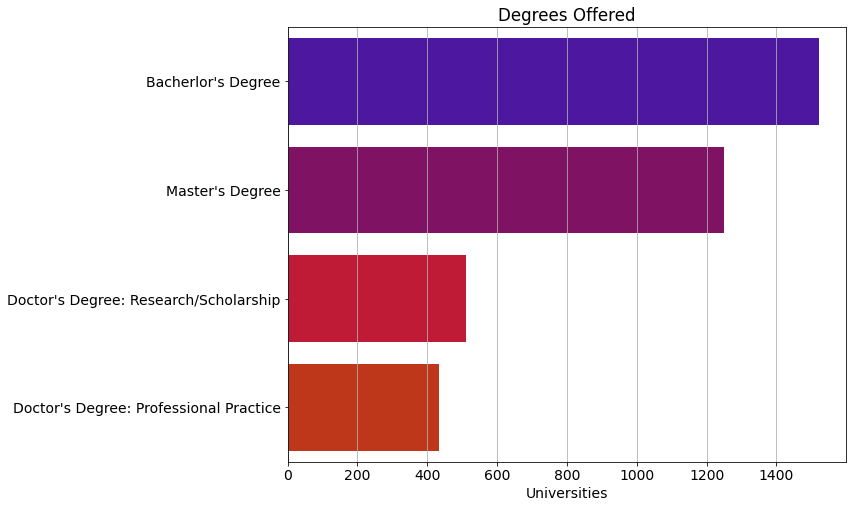

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=degree, y=degree.index)
ax.set_yticklabels(("Bacherlor's Degree", "Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"))
plt.title('Degrees Offered')
plt.xlabel('Universities')
plt.grid(axis='x');

In [ ]:
hg_degree = universitiesnw_df.highest_degree_offered.value_counts()

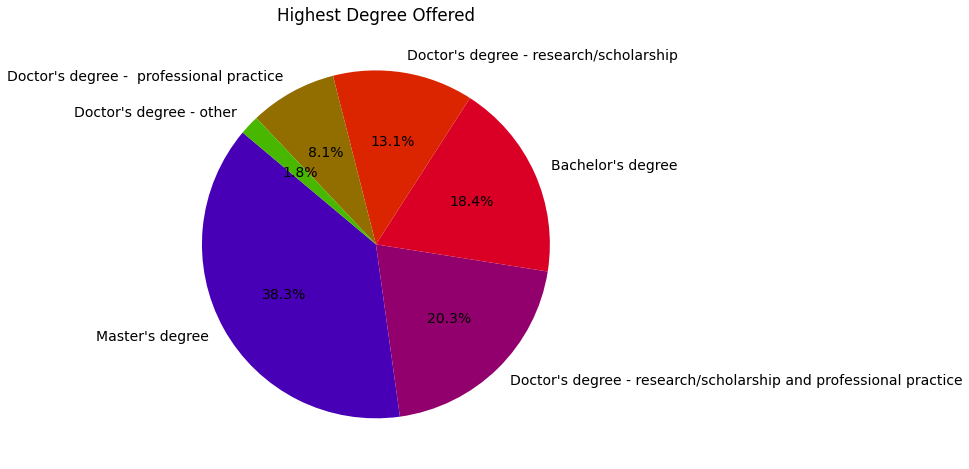

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(hg_degree, labels=hg_degree.index,
        autopct='%.1f%%', startangle=140),
        
plt.title('Highest Degree Offered');

In [ ]:
fig = px.pie(hg_degree, values=hg_degree, names=hg_degree.index, title='highest degrees offered', color_discrete_sequence=px.colors.sequential.thermal)
fig.show(renderer="colab")

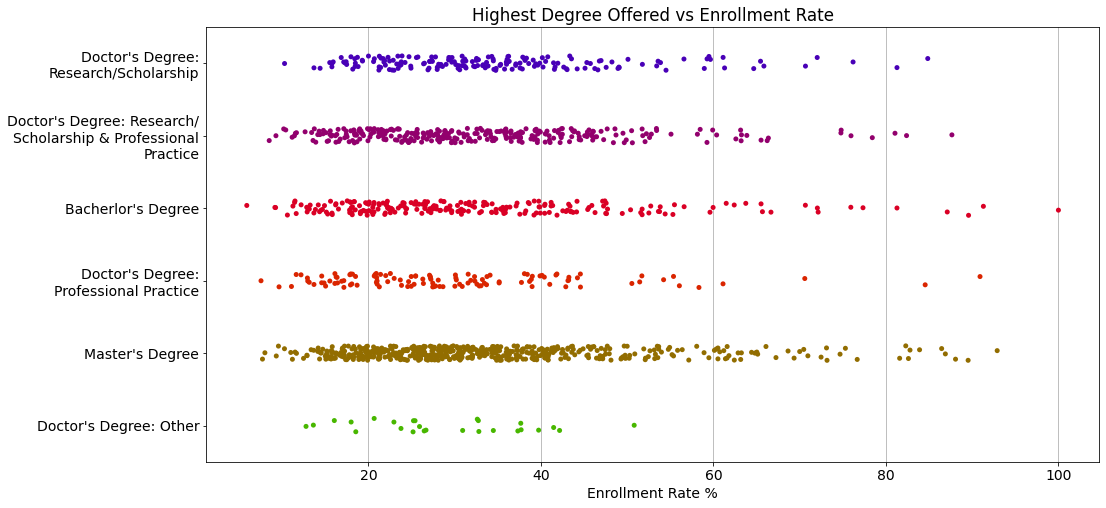

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.stripplot(y='highest_degree_offered', x='enrollment_rate', data=universitiesnw_df)
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree:
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree:
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

In [ ]:
fig = px.strip(universitiesnw_df, y='highest_degree_offered', x='enrollment_rate', color='control_of_institution', title ='Highest Degree Offered vs Enrollment Rate')
fig.show(renderer='colab')

## Map visualization

### Universities Heatmap

In [ ]:
import math

coord_list = [(lat, lon) for lat, lon in zip(universitiesnw_df['latitude_location_of_institution'],
                                             universitiesnw_df['longitude_location_of_institution']) if
              not math.isnan(lat) and not math.isnan(lon)]

In [ ]:
from folium import plugins
universities_heatmap = folium.Map(zoom_start=4,
    location=[37.0902, -95.7129])
plugins.HeatMap(coord_list).add_to(universities_heatmap)

folium.TileLayer('cartodbdark_matter').add_to(universities_heatmap)

universities_heatmap

Alaska is home to few colleges and universities but does contain the University of Alaska system and a private college in Alaska Pacific University

### Top universities with the higest total of applications
blue marker: private with non profit

pink marker: public

In [ ]:
top_app_map_df = universitiesnw_df[
    ['name', 'applicants_total', 'latitude_location_of_institution',
     'longitude_location_of_institution', 'control_of_institution']].sort_values(
    by='applicants_total', ascending=False).head(20)

In [ ]:
def select_marker_color(row):
    if row['control_of_institution'] == 'Public':
        return 'pink'
    else:
        return 'blue'


In [ ]:
top_app_map_df['marker_color'] = top_app_map_df.apply(select_marker_color, axis=1)

In [ ]:
top_app_map = folium.Map(
    zoom_start=4,
    location=[37.0902, -95.7129]
)

for _, state in top_app_map_df.iterrows():
    folium.Marker(
        location=[state['latitude_location_of_institution'], state['longitude_location_of_institution']],
        popup=state['name'],
        tooltip=state['name'],
        icon=folium.Icon(color=state['marker_color'], prefix='fa', icon='circle')
    ).add_to(top_app_map)

top_app_map

In [ ]:
high_app_cluster_map = folium.Map(zoom_start=4,
                     location=[37.0902, -95.7129])
folium.TileLayer('cartodbdark_matter').add_to(high_app_cluster_map) # Sets Tile Theme to (Dark Theme)
from folium.plugins import MarkerCluster
mc = MarkerCluster()
for _, state in top_app_map_df.iterrows():
    folium.Circle(location=[state['latitude_location_of_institution'], state['longitude_location_of_institution']],   color='Blue', fill=True, fill_color='Blue',
                 radius=state['applicants_total']).add_to(mc)
high_app_cluster_map.add_child(mc)

### universities with hight enrollment rate (above 85% of enrollment rate)

In [ ]:
high_enrollment_df = universitiesnw_df[universitiesnw_df.enrollment_rate > 85]

In [ ]:
high_enrollment_df['marker_color'] = high_enrollment_df.apply(select_marker_color, axis=1)

In [ ]:
top_enroll_map = folium.Map(
    zoom_start=4,
    location=[37.0902, -95.7129]
)

for _, state in high_enrollment_df.iterrows():
    folium.Marker(
        location=[state['latitude_location_of_institution'], state['longitude_location_of_institution']],
        popup=state['name'],
        tooltip=state['name'],
        icon=folium.Icon(color=state['marker_color'], prefix='fa', icon='circle')
    ).add_to(top_enroll_map)

top_enroll_map

In [ ]:
high_enroll_cluster_map = folium.Map(zoom_start=4,
                     location=[37.0902, -95.7129])
folium.TileLayer('cartodbdark_matter').add_to(high_enroll_cluster_map) # Sets Tile Theme to (Dark Theme)
from folium.plugins import MarkerCluster
mc = MarkerCluster()
for _, state in high_enrollment_df.iterrows():
    folium.Circle(location=[state['latitude_location_of_institution'], state['longitude_location_of_institution']],   color='Red', fill=True, fill_color='Red',
                 radius=state['enrollment_rate']).add_to(mc)
high_enroll_cluster_map.add_child(mc)

In [ ]:
states = os.path.join('data', 'us-states.json')
unemployement_data = os.path.join('data', 'unemployment-rate.xlsx')
state_data = pd.read_excel(unemployement_data)

m = folium.Map(zoom_start=4,
    location=[37.0902, -95.7129])

folium.Choropleth(
    geo_data=states,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

### population of all states in USA

In [ ]:
population_data = universitiesnw_df[
    ['state', 'population', 'latitude_location_of_institution', 'longitude_location_of_institution']]
population_data.sort_values('population', ascending=False)

,state,population,latitude_location_of_institution,longitude_location_of_institution
131,California,38332521,37.352706,-121.938189
70,California,38332521,34.182987,-117.322508
81,California,38332521,37.871519,-122.260401
80,California,38332521,38.557450,-121.421940
79,California,38332521,34.236710,-118.526817
...,...,...,...,...
1402,Vermont,626630,44.641736,-72.671154
1401,Vermont,626630,43.517134,-73.241107
1400,Vermont,626630,44.279120,-72.437252
1398,Vermont,626630,43.607982,-73.181486


In [ ]:
states = os.path.join('data', 'us-states.json')

population_map = folium.Map(zoom_start=4,
    location=[37.0902, -95.7129])

folium.Choropleth(
    geo_data=states,
    name="choropleth",
    data=population_data,
    columns=["state", "population"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="State population in 2013",
).add_to(population_map)

folium.LayerControl().add_to(population_map)

population_map

### GDP per capita in each state

In [ ]:
gdp_state_df.reset_index(inplace=True)

In [ ]:
states = os.path.join('data', 'us-states.json')

gdp_capita_map = folium.Map(zoom_start=4,
    location=[37.0902, -95.7129])

folium.Choropleth(
    geo_data=states,
    name="choropleth",
    data=gdp_state_df,
    columns=["state", "gdp_capita"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="GDP per capita in 2013",
).add_to(gdp_capita_map)

folium.LayerControl().add_to(gdp_capita_map)

gdp_capita_map


# Future work
Build a machine learning model to predict the total enrollment of universities.

Create interactive dashboard and host to the cloud

# Get in Touch

If you have any questions, want to report bugs, or want to access all materials, feel free to reach me via email: menghai.taing@gmail.com or [telegram](https://t.me/Menghaiii). Thank you!